In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Скачайте данные со страницы
https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data

    1.Основная задача – проанализировать группы клиентов и ответить на вопрос, какой тип рекламы был успешнее
    2.Вы можете воспользоваться дополнительными переменными, характеризующими клиента для поиска гетерогенных эффектов от рекламы
    3.Помните, что любой вывод об эффективности / неэффективности должен быть подтвержден статистическим тестом!
    4.Срок – до 28 октября


Data dictionary:

Index: Row index
       Индекс строки

user id: User ID (unique) 
         Идентификатор пользователя (уникальный)
    
test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
            Если "ad", то пользователь увидел рекламу, если "psa", то он увидел только публичное объявление.

converted: If a person bought the product then True, else is False
           Если пользователь купил продукт, то True, иначе - False

total ads: Amount of ads seen by person
           Количество объявлений, просмотренных пользователем. количество показов рекламы

most ads day: Day that the person saw the biggest amount of ads
              День, когда пользователь увидел наибольшее количество объявлений

most ads hour: Hour of day that the person saw the biggest amount of ads
               В какое время дня пользователь просмотрел наибольшее количество рекламы


In [35]:
df = pd.read_csv (r"https://raw.githubusercontent.com/Borlukos/Python/refs/heads/main/marketing_AB.csv")

In [36]:
df.head(25)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


In [37]:
# Проверим датафрейм на дубликаты
df[df.duplicated()]

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour


In [38]:
# Проверим датафрейм на пропуски
df.isna().sum() 

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [ ]:
# Посмотрим на уникальные значения 

In [39]:
df['test group'].unique()

array(['ad', 'psa'], dtype=object)

In [40]:
df['converted'].unique()

array([False,  True])

In [41]:
df['most ads day'].unique()

array(['Monday', 'Tuesday', 'Friday', 'Saturday', 'Wednesday', 'Sunday',
       'Thursday'], dtype=object)

In [42]:
df['most ads hour'].unique()

array([20, 22, 18, 10, 14, 13, 19, 11, 12, 16, 21,  3, 23,  4,  8,  0,  2,
       15,  1,  6, 17,  7,  9,  5])

In [45]:
df.shape

(588101, 7)

In [46]:
# А - пользователи видели рекламу
group_a = df[df['test group']=='ad']
group_a.shape

(564577, 7)

In [47]:
# Б - пользователи видели только публичное объявление
group_b = df[df['test group']=='psa']
group_b.shape

(23524, 7)

In [48]:
# Всего пользователей купили продукт 
df[df['converted']==1].shape[0]


14843

In [49]:
# A - пользователи видели рекламу и купили продукт 
group_a[group_a['converted']==True].shape[0]

14423

In [50]:
# Б - пользователи видели только публичное объявление и купили продукт
group_b[group_b['converted']==True].shape[0]

420

Конверсия

In [51]:
print('Конверсия всего:', df[df['converted'] == True].shape[0] / df.shape[0])
print('Конверсия группы А:', group_a[group_a['converted'] == True].shape[0] / group_a.shape[0])
print('Конверсия группы Б:', group_b[group_b['converted'] == True].shape[0] / group_b.shape[0])

Конверсия всего: 0.02523886203220195
Конверсия группы А: 0.025546559636683747
Конверсия группы Б: 0.01785410644448223


In [54]:
print('Конверсия всего:', df['converted'].fillna(0).mean())
print('Конверсия группы А:', group_a['converted'].fillna(0).mean())
print('Конверсия группы Б:', group_b['converted'].fillna(0).mean())

Конверсия всего: 0.02523886203220195
Конверсия группы А: 0.025546559636683747
Конверсия группы Б: 0.01785410644448223


Тест на значимость разницы между группами

In [53]:
stats.ttest_ind(group_a['converted'].fillna(0), group_b['converted'].fillna(0))

Ttest_indResult(statistic=7.37040597428566, pvalue=1.7033052627831264e-13)

Нулевая гипотеза теста - это равенство средней конверсии в обеих группах
Сравниваем р-значение с альфой = 5%

р-значение < 5% (...e-13) => отвергаем нулевую гипотезу, средние конверсии в группах А и Б отличаются  

Конверсия группы А (0.02554) больше конверсии группы Б (0.01785). 
Следовательно, реклама была эффективнее (успешнее) публичных объявлений. 

Характеристики групп

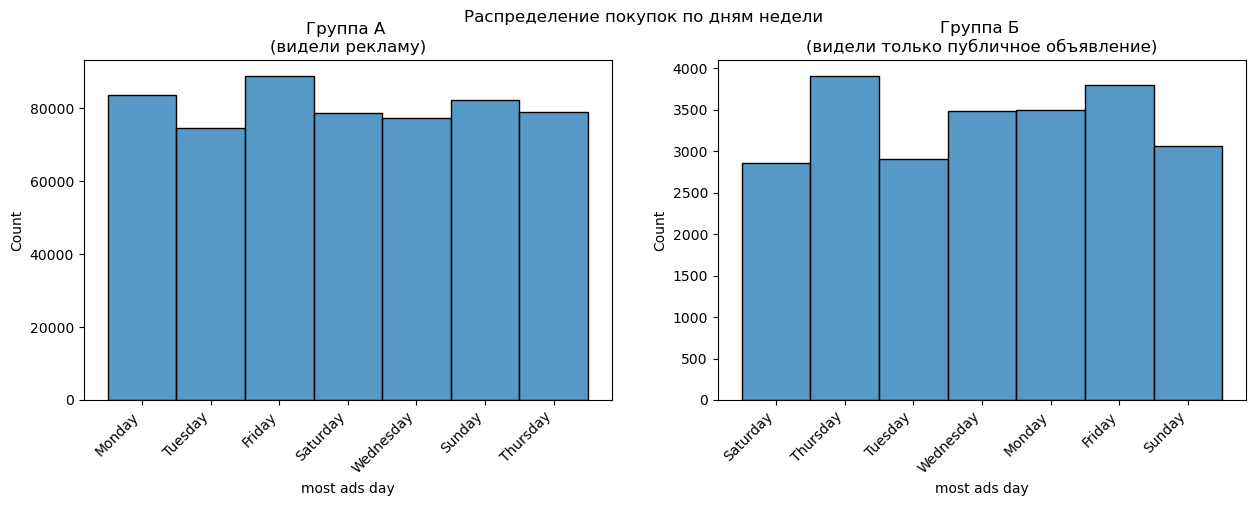

In [126]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Распределение покупок по дням недели ')
sns.histplot(group_a['most ads day'], ax = ax[0])
sns.histplot(group_b['most ads day'], ax = ax[1])
ax[0].set_title('Группа А \n(видели рекламу)')
ax[1].set_title('Группа Б \n(видели только публичное объявление)')
fig.autofmt_xdate(rotation=45)
plt.show()

Посмотрим на гетерогенность эффектов в группах А и В 

Распределение по дням недели 

In [76]:
group_a.groupby('most ads day')['converted'].mean()

most ads day
Friday       0.022465
Monday       0.033241
Saturday     0.021307
Sunday       0.024620
Thursday     0.021637
Tuesday      0.030440
Wednesday    0.025356
Name: converted, dtype: float64

In [77]:
group_b.groupby('most ads day')['converted'].mean()

most ads day
Friday       0.016303
Monday       0.022559
Saturday     0.013996
Sunday       0.020595
Thursday     0.020230
Tuesday      0.014448
Wednesday    0.015759
Name: converted, dtype: float64

Сравниваем средние конверсии по дням недели: 

Monday    (пн)    Конверсия группы А (0.033241) > конверсии группы Б (0.022559), разница: 0.010682
Tuesday   (вт)    Конверсия группы А (0.030440) > конверсии группы Б (0.014448), разница: 0.015992
Wednesday (ср)    Конверсия группы А (0.025356) > конверсии группы Б (0.015759), разница: 0.009597
Thursday  (чт)    Конверсия группы А (0.021637) > конверсии группы Б (0.020230), разница: 0.001407 (мин)
Friday    (пт)    Конверсия группы А (0.022465) > конверсии группы Б (0.016303), разница: 0.006162
Saturday  (сб)    Конверсия группы А (0.021307) > конверсии группы Б (0.013996), разница: 0.007311
Sunday    (вс)    Конверсия группы А (0.024620) > конверсии группы Б (0.020595), разница: 0.004025


Тест на значимость эффекта для каждого дня недели

Нулевая гипотеза теста - это равенство средней конверсии в обеих группах 
Сравниваем р-значение с альфой = 5%


In [78]:
stats.ttest_ind(group_a[group_a['most ads day']=='Monday']['converted'], group_b[group_b['most ads day']=='Monday']['converted'])

Ttest_indResult(statistic=3.4767998173189745, pvalue=0.0005076838310420106)

In [ ]:
р-значение < 5% => отвергаем нулевую гипотезу

In [79]:
stats.ttest_ind(group_a[group_a['most ads day']=='Tuesday']['converted'], group_b[group_b['most ads day']=='Tuesday']['converted'])

Ttest_indResult(statistic=4.9725001795688915, pvalue=6.623580376546489e-07)

In [ ]:
р-значение < 5% => отвергаем нулевую гипотезу

In [80]:
stats.ttest_ind(group_a[group_a['most ads day']=='Wednesday']['converted'], group_b[group_b['most ads day']=='Wednesday']['converted'])

Ttest_indResult(statistic=3.556325296980843, pvalue=0.00037629299081835306)

In [ ]:
р-значение < 5% => отвергаем нулевую гипотезу

In [81]:
stats.ttest_ind(group_a[group_a['most ads day']=='Thursday']['converted'], group_b[group_b['most ads day']=='Thursday']['converted'])

Ttest_indResult(statistic=0.5906506740406489, pvalue=0.5547561128146212)

In [ ]:
р-значение > 5% => НЕ отвергаем нулевую гипотезу, ср. конверсии в группах А и Б равны 


In [82]:
stats.ttest_ind(group_a[group_a['most ads day']=='Friday']['converted'], group_b[group_b['most ads day']=='Friday']['converted'])

Ttest_indResult(statistic=2.5250884891161647, pvalue=0.011568571026075112)

In [ ]:
р-значение < 5% => отвергаем нулевую гипотезу

In [83]:
stats.ttest_ind(group_a[group_a['most ads day']=='Saturday']['converted'], group_b[group_b['most ads day']=='Saturday']['converted'])

Ttest_indResult(statistic=2.6745960256483388, pvalue=0.007483424454519301)

In [ ]:
р-значение < 5% => отвергаем нулевую гипотезу

In [85]:
stats.ttest_ind(group_a[group_a['most ads day']=='Sunday']['converted'], group_b[group_b['most ads day']=='Sunday']['converted'])

Ttest_indResult(statistic=1.4145989240334367, pvalue=0.15718977081077093)

In [ ]:
р-значение > 5% => НЕ отвергаем нулевую гипотезу, ср. конверсии в группах А и Б равны 

Вывод: 
В дни недели Thursday (чт) и Sunday (вс) разница в эффективности между рекламой и публичными объявлениями - несущественная. 
Во все остальные дни недели эффективность рекламы была выше, чем публичных объявлений. 